## Implementación de una IA para predecir intensidad de ejercicios matemáticos.

### Descripción

Para diseñar la IA se implementarán 2 métodos de de ML. Se utilizará una Red Neuronal Artificial y un Supporting Vector Machine para ver cuál de los 2 da mejor precisión al momento de obtener resultados. Lo que se busca es que cuando un nuevo jugador entre al juego, se pueda estimadar cuál sería la intensidad con la que se presentarán los ejercicios de cada dificultad. Esta intensidad se irá re-ajustando con base en el desempeño que los usuarios tengan al recibir un grupo de ejercicios.

### Librerías

* __NumPy__: Para operaciones algebráicas y arreglos multidimensionales
* __Pandas__: Para estructuras de datos fáciles de usar, con alto desempeño y varias utilidades de analítica de datos
* __Seaborn__: Para visualizaciones de datos estadísticos con interfaz profesional.
* __Scikit-Learn__: Para realizar preprocesamiento y partición de datos y validar la precisión del modelo de ML.
* __Keras__: Para utilizar redes neuronales de una forma rápida, sin complicaciones.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
#Pre-processing, dataset partition and metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#Deep learning library
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline 

### Limpieza de datos

Antes que nada, hay que preparar los datos. Para esto vamos a cargar los datos del último backup de la base de datos, con nombre _datos_hartford_marzo.csv_.

In [36]:
#Reading the data
hartfortDF = pd.read_csv('datasets/datos_hartford_marzo.csv');
hartfortDF

,id,edad,escuela,genero,grado,loID,problema,respuesta,respuestaJ,tiempo,tipo,userID
0,-LaQZuzKIyNwR9BjyCRb,11,Hartford International School,0,5,0,1+3=?,4,4,3.846108,1,-LaQZtfxo0QA8Ij62dk1
1,-LaQZvtdCeLWO-JIpe-5,10,Hartford International School,0,5,0,1+3=?,4,4,2.995306,1,-LaQZurPwCF55Hiv18kH
2,-LaQZw327YO_BI2Q6T4S,11,Hartford International School,0,5,0,4+2=?,6,6,4.395411,1,-LaQZtfxo0QA8Ij62dk1
3,-LaQZwUESO5MHv2WwDPU,10,Hartford International School,0,5,0,4+2=?,6,6,2.422333,1,-LaQZurPwCF55Hiv18kH
4,-LaQZxM_2u3CMfFABrsf,11,Hartford International School,0,5,0,4+3=?,7,7,5.348062,1,-LaQZtfxo0QA8Ij62dk1
5,-LaQZxo2ftJ6yznn-S0B,11,Hartford International School,0,5,0,3+1=?,4,4,1.821805,1,-LaQZtfxo0QA8Ij62dk1
6,-LaQZyF_PFe28n9FPZ_E,10,Hartford International School,0,5,0,4+3=?,7,7,7.252773,1,-LaQZurPwCF55Hiv18kH
7,-LaQZyJEMTLH8853Xqhd,10,Hartford International School,0,5,0,1+3=?,4,4,8.776219,1,-LaQZvlOUvQcKzVILey9
8,-LaQZz4MQ-QUgAECRK-y,10,Hartford International School,0,5,0,4+2=?,6,6,3.158357,1,-LaQZvlOUvQcKzVILey9
9,-LaQZzA0-R-RZS3wqszl,11,Hartford International School,0,5,0,6+4=?,10,10,5.565162,1,-LaQZtfxo0QA8Ij62dk1


Comenzaremos por obviar algunas columnas del dataset como:
* __id__: El identificador de una respuesta. El index que tiene ese registro en el dataset será más útil.
* __escuela__: Puesto que solo estamos considerando un colegio por el momento, no es necesario tenerlo.
* __tipo__: Hace referencia al tipo de pregunta. Solo se manejarán cerradas, por tanto es irrelevante.

Las variables _respuesta_ y _respuestaJ_ hacen referencia a la respuesta del ejercicio y la del jugador respectivamente. Las respuestas del jugador pueden ser iguales, diferentes o contener un _no sé_ (indicado como un - en el campo de respuestaJ). Por simplicidad para la red neuronal, se utilizará una nueva columna _isCorrect_, donde se indicará si la respuesta fue _correcta_ o _incorrecta_ con un 1 o un 0 respectivamente. Será __correcto__ si la respuesta del jugador y la del problema son las mismas, e __incorrecto__ si la respuesta del jugador es diferente o contiene un _no sé_. 

In [37]:
def isAnswerCorrect(df):
    df['respuesta'] = df['respuesta'].apply(str)
    isCorrect = (df['respuesta'] == df['respuestaJ']);
    return 1*isCorrect;

isCorrectColumn = isAnswerCorrect(hartfortDF);
hartfortDF['isCorrect'] = isCorrectColumn;
hartfortDF = hartfortDF.drop(labels=['id','escuela','problema','respuesta','respuestaJ','tipo'],axis=1)
hartfortDF

,edad,genero,grado,loID,tiempo,userID,isCorrect
0,11,0,5,0,3.846108,-LaQZtfxo0QA8Ij62dk1,1
1,10,0,5,0,2.995306,-LaQZurPwCF55Hiv18kH,1
2,11,0,5,0,4.395411,-LaQZtfxo0QA8Ij62dk1,1
3,10,0,5,0,2.422333,-LaQZurPwCF55Hiv18kH,1
4,11,0,5,0,5.348062,-LaQZtfxo0QA8Ij62dk1,1
5,11,0,5,0,1.821805,-LaQZtfxo0QA8Ij62dk1,1
6,10,0,5,0,7.252773,-LaQZurPwCF55Hiv18kH,1
7,10,0,5,0,8.776219,-LaQZvlOUvQcKzVILey9,1
8,10,0,5,0,3.158357,-LaQZvlOUvQcKzVILey9,1
9,11,0,5,0,5.565162,-LaQZtfxo0QA8Ij62dk1,1


Estos datos presentan algunas anomalías, pues el banco de preguntas tiene 25 preguntas. El número de datos actual no corresponde a un múltiplo de 25, por tanto hay datos basura. Además, se sabe que hay un niño con edad "1" en el dataset. Esto no debería ser posible. Por tanto es necesario realizar unos ajustes al dataset completo. Solo se considerarán los niños con _edad > 4_. 

In [38]:
hartfortDF = hartfortDF.loc[lambda x: x.edad > 4]

Acto seguido, eliminará al usuario con número de ejercicios incompleto. Para saber esto se agruparán los niños por userID y se realizará un conteo de cuantos registros tiene su ID asociado. Si todas las respuestas fueron contestadas, debería aparecer un valor de 25 en todas las columnas de ese registro. La variable _uncompleteData_ tendrá la información del usuario con menos de 25 respuestas, donde tomaremos su userID y se procederá a eliminar del dataset.

In [39]:
uncompleteData = hartfortDF.groupby(['userID']).count().loc[lambda x: x.edad < 25]
hartfortDF = hartfortDF.loc[lambda x: x.userID != '-LaQlc1fC7y-HDX9BHFG']
#hartfortDF.groupby(['grado','genero','loID']).mean()

Como eliminamos datos, es necesario reajustar los indices que tiene cada registro en el dataset.

C:\Users\Steven\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


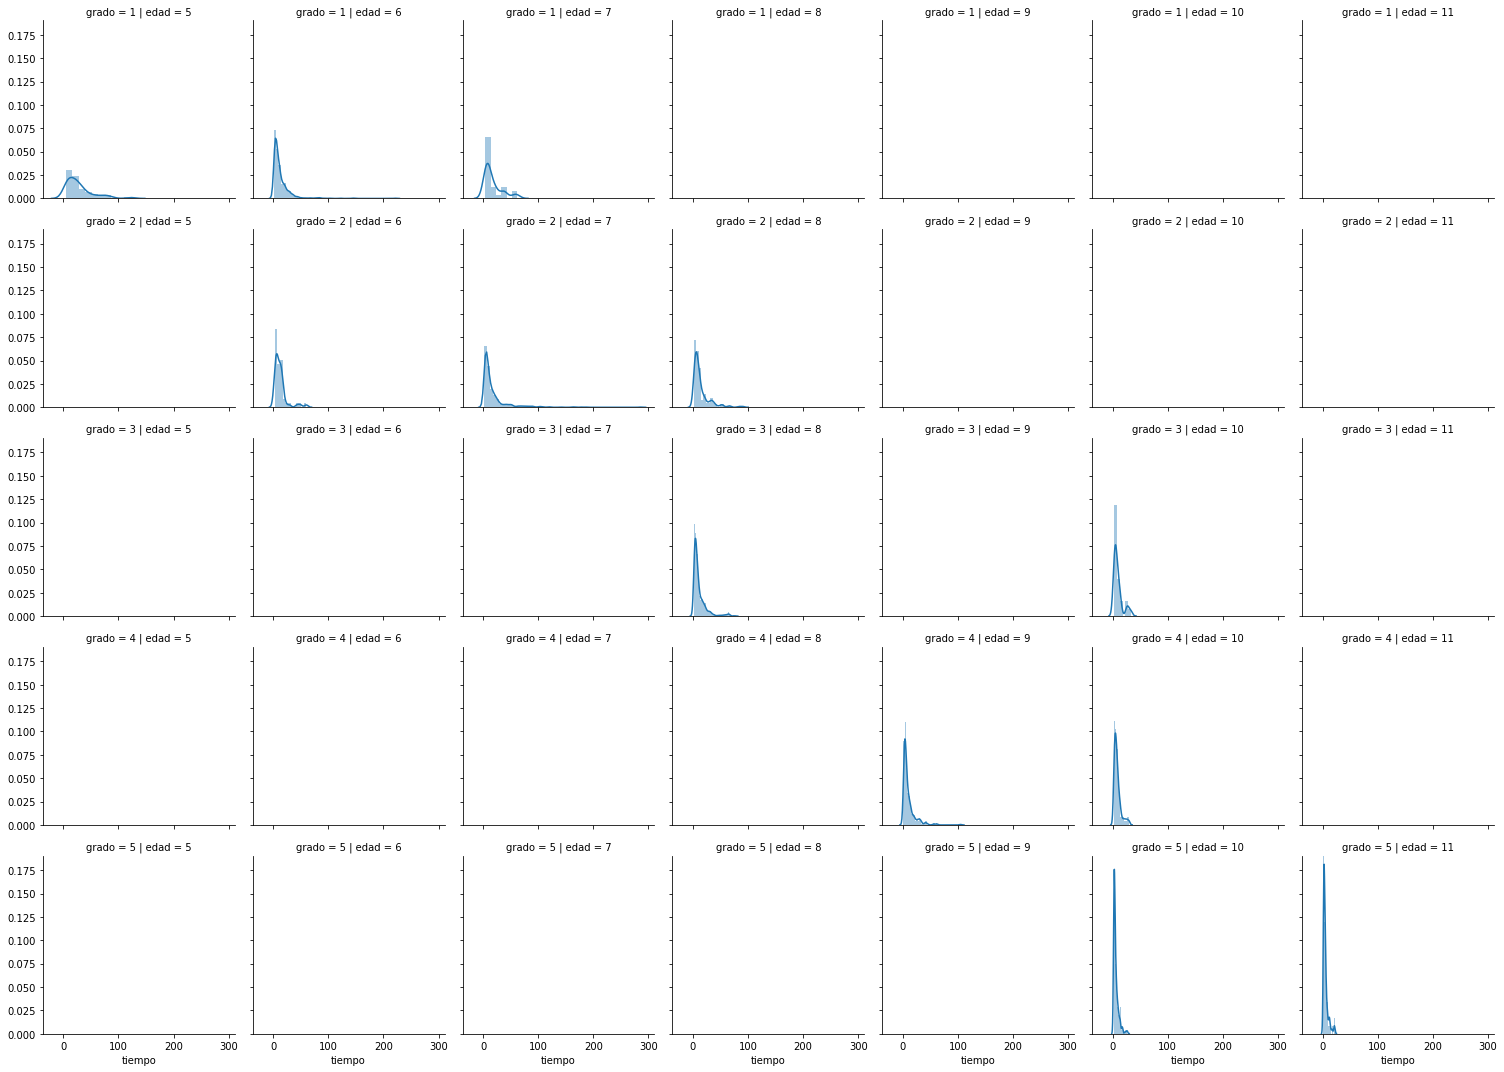

In [40]:
hartfortDF = hartfortDF.reset_index()
#sns.FacetGrid(hartfortDF,row='grado',col='edad').map(sns.distplot, "tiempo")

Para trabajar con 

Con el fin de obtener el mejor performance para nuestra red neuronal, es necesario normalizar los datos para que cuando se estén hayando relaciones entre ellos el cómputo sea mucho más flexible y reduce imperfecciones al momento de predecir. La variable tiempo presenta una distribución normal sesgada a la derecha, así que podemos normalizarlo con confianza.

In [ ]:
timeMedianPerGrade = hartfortDF.groupby(['loID','grado'])['tiempo'].median();
timesMedianDF = timeMedianPerGrade.reset_index();
hartfortDF['score'] = hartfortDF.apply(answerScore,axis=1);

#Mostrando mediana por grado y dificultad
#Realizar bulletplot
#sns.barplot(x=timesMedianDF['grado'],y=timesMedianDF['tiempo'], hue=timesMedianDF['loID']);

#Grouping users
usersTimesMean = hartfortDF.groupby(['userID','loID'])['score'].mean().reset_index();
usersTimesMean['intensity'] = usersTimesMean.apply(calculateIntensities,axis=1);
usersTimesMean.round({'intensity':1})

#General user information
generalUserInfo = hartfortDF.groupby(['userID']).mean()
generalUserInfo = generalUserInfo.drop(labels=['loID','tiempo','isCorrect','score'],axis=1);

#Adding the LOs intensity to the dataset
#This intensity dice qué tan bien va para ese LO. Si se interpreta que un niño tiene
#0.6 en el LO1, significa que necesita una intensidad de 1-0.6 -> 0.4 de ejercicios
#para la siguiente pasada.
LOIntensitiesPerUser = getIntensityDF(usersTimesMean);
LOIntensitiesPerUser = LOIntensitiesPerUser.set_index('userID');
LOIntensitiesPerUser = LOIntensitiesPerUser.round(1);
generalUserInfo[['LOIN0','LOIN1','LOIN2','LOIN3','LOIN4']] = LOIntensitiesPerUser[['LOI0','LOI1','LOI2','LOI3','LOI4']];
X = generalUserInfo.drop(labels=['LOIN0','LOIN1','LOIN2','LOIN3','LOIN4'],axis=1);
Y = generalUserInfo[['LOIN0','LOIN1','LOIN2','LOIN3','LOIN4']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
sc = StandardScaler() #Must be scaled to avoid variable domination
#Transforming dataset
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Building the ANN
classifier = Sequential();
classifier.add(Dense(input_dim=3, activation='relu', kernel_initializer='uniform', units=10));
classifier.add(Dense(kernel_initializer='normal',units=5))
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['mse','mae']);
classifier.fit(X_train, y_train, batch_size=5, epochs=50)
y_pred = classifier.predict(X_test);